In [503]:
# -*- coding: utf-8 -*-

'''
moc^2 = rest energy of electron = 511 keV
tita  = angle between incident and scattered gamma rays

planck constant
h = 6.62606957 × 10-34 m2 kg / s
h =  4.135667516 x 10-15 eV*s
c = 299792458 m / s

1 J = 6241509647120.4 MeV
1 eV = 1.602176487E-19 J
1 MeV = 1.602176487E-13 J

E = hc/wavelength
freq = c/wavelength


Compton wavelength: h/mec = 2.43 x 10-12 m comptonWl
me: masa del electron
    9.10938215(45)×10−31 Kg
re: radio del electrón
    2.818x10-15 m


1 barn = 10-28 m2 = 10-24 cm2

'''

class Units:
    comptonWl =  2.43e-12
    c = 299792458
    hmk = 6.62606957e-34
    hev = 4.135667516e-15
    me =  9.10938215e-31
    re = 2.818e-15
    rec = 2.818e-13
    barn = 10e-28 #m2
    re2 = re * re # m2
    

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def compton_energy(angle, E): # E en MeV
    return E / (1 + (E/0.511) * (1 - np.cos(angle)))

def kn(angle, E): # E en Mev
    Er = energy(angle, E)/E
    return ((Units.rec * Er) ** 2)*(Er + 1/Er - np.sin(angle) ** 2) / 2

def kn_knoll(angle, E): #E in Mev
    alpha = E / .511
    x = 1 - np.cos(angle)
    t2 = 1 + np.cos(angle) ** 2
    t3 = t2 / 2
    t4 = 1 / (1 + alpha * x)**2
    t5 = (1 + (alpha**2 * (x**2))/(t2*(1 + alpha * x)))
    
    return ((Units.rec ** 2) * t4 * t3 * t5)
    
def kn_kn(angle, E): # E en MeV
    x = 1 - np.cos(angle)
    alpha = E / .511
    y = 1 + alpha * x
    z = y ** (-2)
    w = 1 + np.cos(angle) ** 2
    
    return ((Units.rec ** 2/2) * z * (w + ((alpha * x) ** 2)/y))

def kn_geant(angle, E):
    x = 1 - np.cos(angle)
    alpha = E / .511
    epsilon = (1+alpha*x)
    sen2 = np.sin(angle)**2
    f1 = epsilon + epsilon**(-1)
    
    return ((Units.rec ** 2)*f1*(1- sen2/f1)) /2

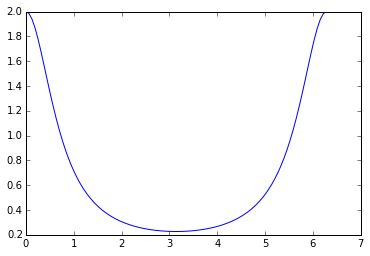

In [490]:
if __name__ == "__main__":
    angle = np.linspace(0, 2*np.pi, 100)
    ce = compton_energy(angle, 2)
    
    plt.plot(angle, ce)
    
  

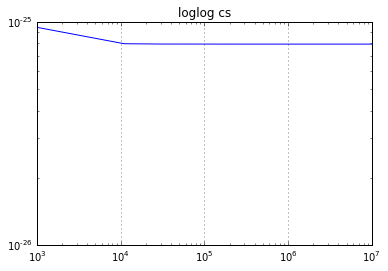

In [491]:
if __name__ == "__main__":
    
    angle = np.linspace(0, np.pi, 100)
    energies = np.linspace(0.001*1e6,10 * 1e6,1000)
    cs = np.zeros_like(energies)
    
    i = 0
    for e in energies:
        dcs_10 = kn_knoll(angle , e).sum()
        cs[i] = dcs_10
        i = i + 1
        
        
    
    # log x and y axis
    plt.subplot(111)
    plt.loglog(energies, cs, basex=10)
    plt.grid(True)
    plt.title('loglog cs')   

    plt.show()

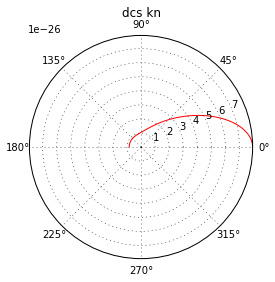

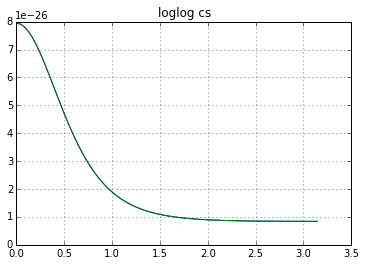

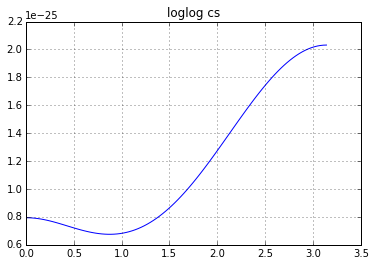

In [509]:
dcs_10 = kn_kn(angle, 1)
dcs_11 = kn_knoll(angle, 1)


dcs_12 = kn_geant(angle, 1)

ax = plt.subplot(111, polar=True)
ax.plot(angle, dcs_10, color='r', linewidth=1)
ax.set_rmax(dcs_10.max())
ax.grid(True)

ax.set_title("dcs kn", va='bottom')
plt.show()


# log x and y axis
plt.subplot(111)
plt.plot(angle, dcs_10)
plt.plot(angle, dcs_11)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

# log x and y axis
plt.subplot(111)

plt.plot(angle, dcs_12)
plt.grid(True)
plt.title('loglog cs')   

plt.show()



## Photon Cross Section

#### Energy|Cohe_Scat|Inco_Scat|Pho_Absr|Nuc_PrPrd|Elc_PrPrd|Tot_wCohe|Tot_sCohe|

Photon cross section data for a single element, compound, or mixture [link](http://physics.nist.gov/PhysRefData/Xcom/html/xcom1-t.html)

### Datos para el INa

* #### I: Z = 53 %W 0.84627 dens 4.93 g/cm3
* #### Na: Z = 11 %W 0.153373 dens 0.97 g/cm3

* #### NaI: dens = 4.3224 g/cm3


In [18]:
densNa = 0.97
pcNa = 0.15373
densI  = 4.93
pcI = 0.84627
densNaI = densNa * pcNa + densI * pcI
print(densNaI)

4.321229199999999


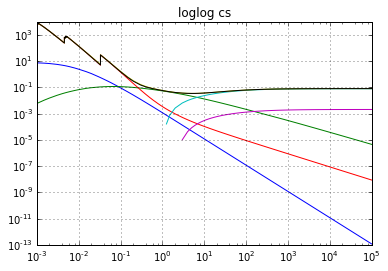

In [286]:
import csv

rows=[]

with open('xcom_ina.pl') as csvfile:
    reader = csv.DictReader(csvfile,delimiter='|')
    for row in reader:
        # http://stackoverflow.com/questions/14813396/python-elegant-way-to-delete-empty-lists-from-python-dict
        rows.append({k:v for k,v in row.items() if v})

reader.fieldnames = reader.fieldnames[:-1]        
n_fields = len(reader.fieldnames)
n_data = len(rows)

import numpy as np

cs = np.zeros(n_fields * n_data).reshape(n_data, n_fields)

i = 0
for r in rows:
    cs[i] = np.asarray([r[f] for f in reader.fieldnames])
    i = i + 1

# log x and y axis
plt.subplot(111)
for i in range(1, n_fields):
    plt.loglog(cs[:,0], cs[:,i], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

##  Total

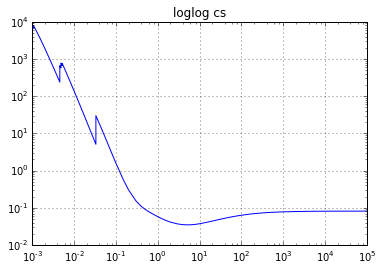

In [287]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,7], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Mean Free Path

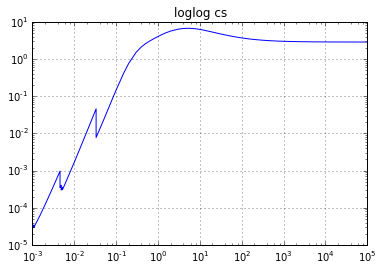

2.92007110615e-05 6.66519686527 2.70212609335


In [288]:
mfp = 1/(cs[:,7] * densNaI)

# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], mfp, basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()
print(mfp.min(), mfp.max(), mfp.mean())

## Absorción fotoeléctrica

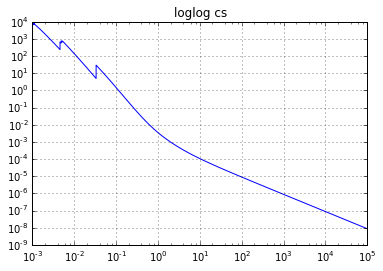

In [22]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,3], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Producción de pares

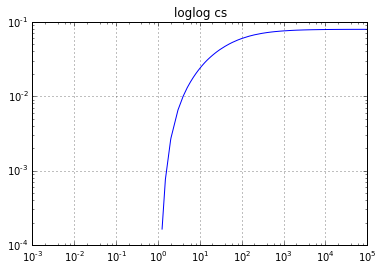

In [29]:
# log x and y axis
plt.subplot(111)
#plt.loglog(cs[:,0], cs[:,5], basex=10)
plt.loglog(cs[:,0], cs[:,4], basex=10)

#lt.loglog(cs[:,0], cs[:,5]+cs[:,4], basex=10)


plt.grid(True)
plt.title('loglog cs')   

plt.show()

## Incoherent scatering - Compton

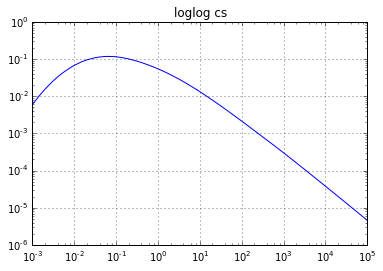

In [24]:
# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], cs[:,2], basex=10)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

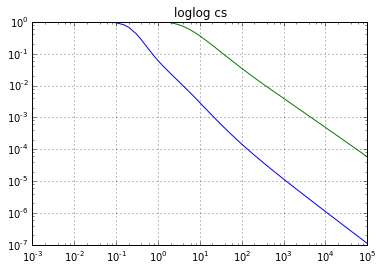

In [122]:
mu_total = cs[:,4] + cs[:,3] + cs[:,2] # pares + photo + compton

p_photo_e = cs[:,3] / mu_total
p_photo_compton_e = (cs[:,3] + cs[:,2]) / mu_total

# log x and y axis
plt.subplot(111)
plt.loglog(cs[:,0], p_photo_e, basex=10)
plt.loglog(cs[:,0], p_photo_compton_e)

plt.grid(True)
plt.title('loglog cs')   

plt.show()

In [207]:
N = 1000000
R = np.random.random(size = N)
E = 1.02205 # Mev
p_photo_compt = np.interp(E, cs[:,0], p_photo_compton_e)
p_photo = np.interp(E, cs[:,0], p_photo_e)

a = R <= p_photo 

b = R > p_photo
c = R <= p_photo_compt
d = b & c
e = R > p_photo_compt
n_compton = d.sum()
n_photo = a.sum()
n_pair = e.sum()

print("photo", n_photo)
print("compton", n_compton)
print("pair",  n_pair)

photo 58509
compton 941491
pair 0


In [209]:
# aceptacion klein-nishina
# solid angle
N = n_compton
angle_c = np.arccos(1 - 2 * np.random.random(size=N)) 

#cross section
r0 = 2.818e-13 #cm
cross_section = (r0 ** 2) * np.random.random(size = N) / 2

kn = kn_knoll(angle_c, 1)

accept = (cross_section < kn)

print(accept.sum())

111212


In [25]:
# interpolar
# >>> xp = [1, 2, 3]
# >>> fp = [3, 2, 0]
# >>> np.interp(2.5, xp, fp)
lambda_ = np.interp(1, cs[:,0], mfp)

N = 10000
s = - lambda_ * np.log(np.random.random(size=N))
u = 2*np.random.random(size=N) - 1

x = s *u

print(x[x>5].size)
print(x[x<0].size)


550
5008


# Sine and cosine of random angle in 2D


In [26]:
N = 100
u1 = np.random.random(size=N)
u2 = np.random.random(size=N)
v1 = 2 * u1 - 1
v2 = u2
r2 = v1 ** 2 + v2 ** 2

S = 2 * v1 * v2 / r2
C = (v1 ** 2 - v2 ** 2) / r2

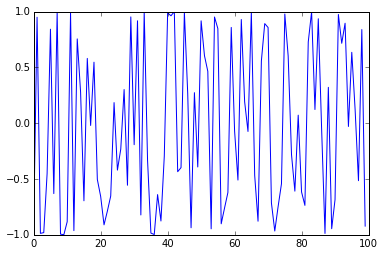

In [27]:
plt.plot (S)

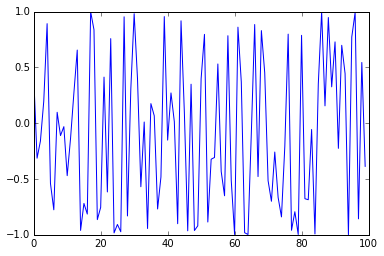

In [28]:
plt.plot(C)

In [469]:
N = 80
E = .661
H = 5
acum_photo = 0
acum_no_interactuan = 0
# E ang_p ang_a x
Estado = np.zeros(4*N).reshape(4, N)
Estado[0:1, :] +=.661   # asigno la energía

mfp0 = np.interp(Estado[0:1,:], cs[:,0], mfp)

rs = np.random.random(N)

# determino el recorrido
Estado[3:4,:] = - mfp0 * np.log(rs)

In [470]:
no_interactuan = Estado[3:4,] > H
acum_no_interactuan += no_interactuan.sum()
Estado = np.delete(Estado, np.nonzero(no_interactuan[0])[0], 1)

In [471]:
p_photo = np.interp(Estado[0:1,:], cs[:,0], p_photo_e)
rp = np.random.random(Estado.shape[1])
hacen_photo = rp <= p_photo
acum_photo += hacen_photo.sum()
Estado = np.delete(Estado, np.nonzero(hacen_photo[0])[0], 1)

In [472]:
print (acum_photo, acum_no_interactuan, Estado.shape)

3 26 (4, 51)
